In [ ]:
# read in the csv data file using Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cep = pd.read_csv("Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [ ]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

Text(0.5, 1.0, 'LMC Cloud, Mode F')

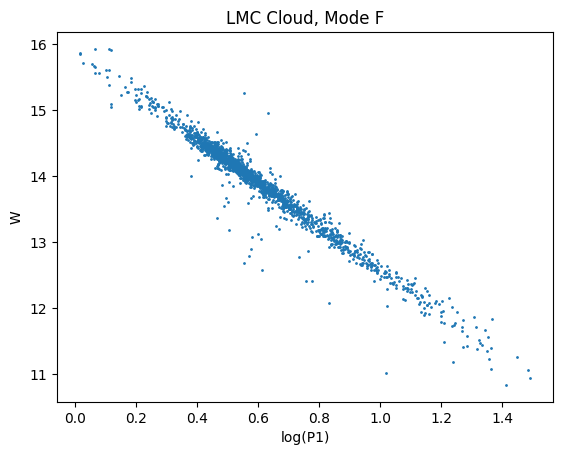

In [ ]:
# Subset 1: LMC Cloud, Mode F
lmcf_W=lmcf['W'].values.reshape(-1, 1)
lmcf_P=lmcf['logP1'].values.reshape(-1, 1)
plt.scatter(lmcf_P, lmcf_W,s=1)
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.title('LMC Cloud, Mode F')

Text(0.5, 1.0, 'LMC Cloud, Mode 1')

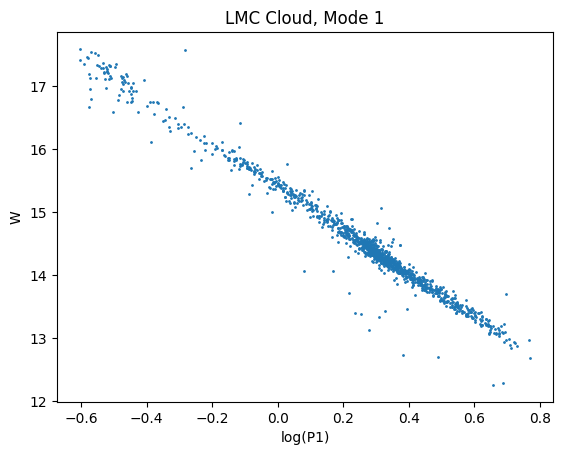

In [ ]:
# Subset 2: LMC Cloud, Mode 1
lmco_W=lmco['W'].values.reshape(-1, 1)
lmco_P=lmco['logP1'].values.reshape(-1, 1)
plt.scatter(lmco_P, lmco_W,s=1)
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.title('LMC Cloud, Mode 1')

Text(0.5, 1.0, 'SMC Cloud, Mode F')

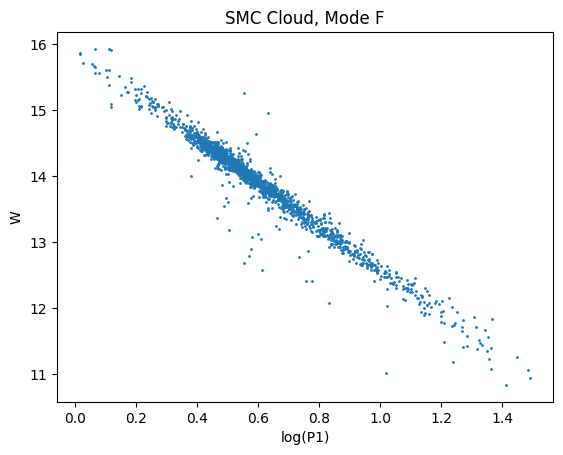

In [ ]:
# Subset 3: SMC Cloud, Mode F
smcf_W=lmcf['W'].values.reshape(-1, 1)
smcf_P=lmcf['logP1'].values.reshape(-1, 1)
plt.scatter(smcf_P, smcf_W,s=1)
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.title('SMC Cloud, Mode F')

Text(0.5, 1.0, 'SMC Cloud, Mode 1')

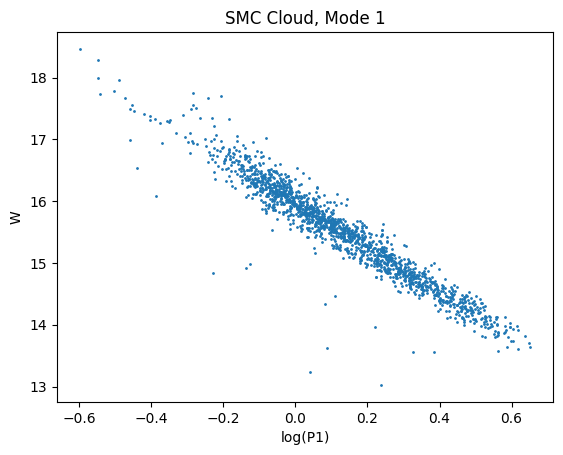

In [ ]:
# Subset 4: SMC Cloud, Mode 1
smco_W=smco['W'].values.reshape(-1, 1)
smco_P=smco['logP1'].values.reshape(-1, 1)
plt.scatter(smco_P, smco_W,s=1)
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.title('SMC Cloud, Mode 1')

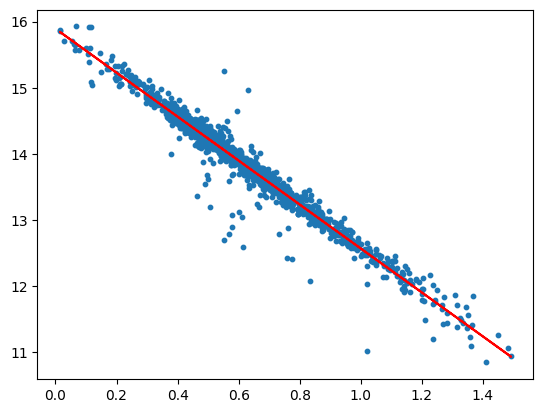

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit linear regression for LMC Cloud, Mode F
reg_lmcf = LinearRegression()
reg_lmcf.fit(lmcf_P, lmcf_W)


# Plotting the data points and regression lines
plt.scatter(lmcf_P, lmcf_W, s=10, label='LMC Cloud, Mode F')
plt.plot(lmcf_P, reg_lmcf.predict(lmcf_P), color='red', label='LMC Cloud, Mode F Regression')





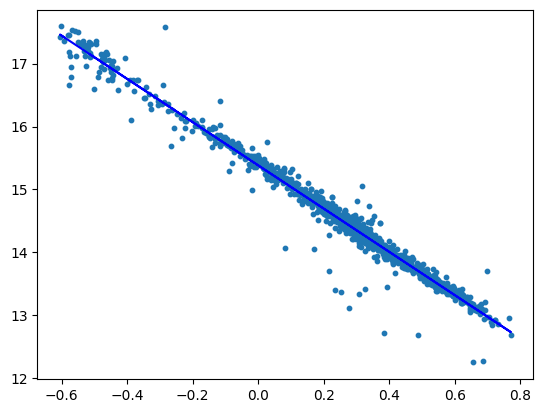

In [ ]:
# Fit linear regression for LMC Cloud, Mode 1
reg_lmco = LinearRegression()
reg_lmco.fit(lmco_P, lmco_W)

# Plotting the data points and regression lines
plt.scatter(lmco_P, lmco_W, s=10, label='LMC Cloud, Mode 1')
plt.plot(lmco_P, reg_lmco.predict(lmco_P), color='blue', label='LMC Cloud, Mode 1 Regression')

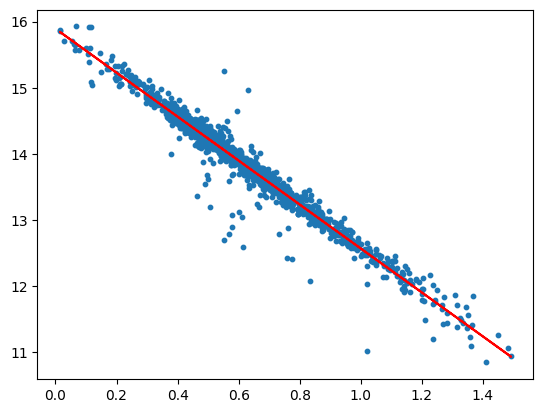

In [ ]:
# Fit linear regression for SMC Cloud, Mode F
reg_smcf = LinearRegression()
reg_smcf.fit(smcf_P, smcf_W)

# Plotting the data points and regression lines
plt.scatter(smcf_P, smcf_W, s=10, label='SMC Cloud, Mode F')
plt.plot(smcf_P, reg_smcf.predict(smcf_P), color='red', label='SMC Cloud, Mode F Regression')


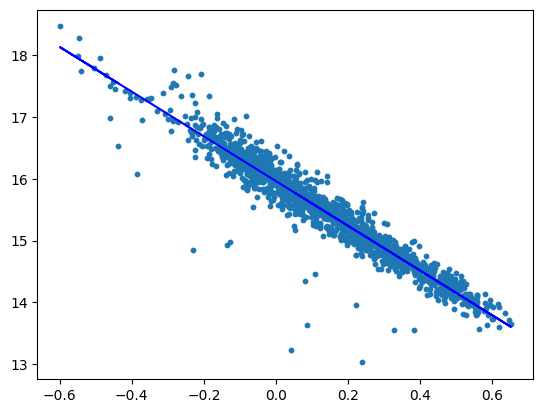

In [ ]:
# Fit linear regression for SMC Cloud, Mode 1
reg_smco = LinearRegression()
reg_smco.fit(smco_P, smco_W)

# Plotting the data points and regression lines
plt.scatter(smco_P, smco_W, s=10, label='SMC Cloud, Mode 1')
plt.plot(smco_P, reg_smco.predict(smco_P), color='blue', label='SMC Cloud, Mode 1 Regression')

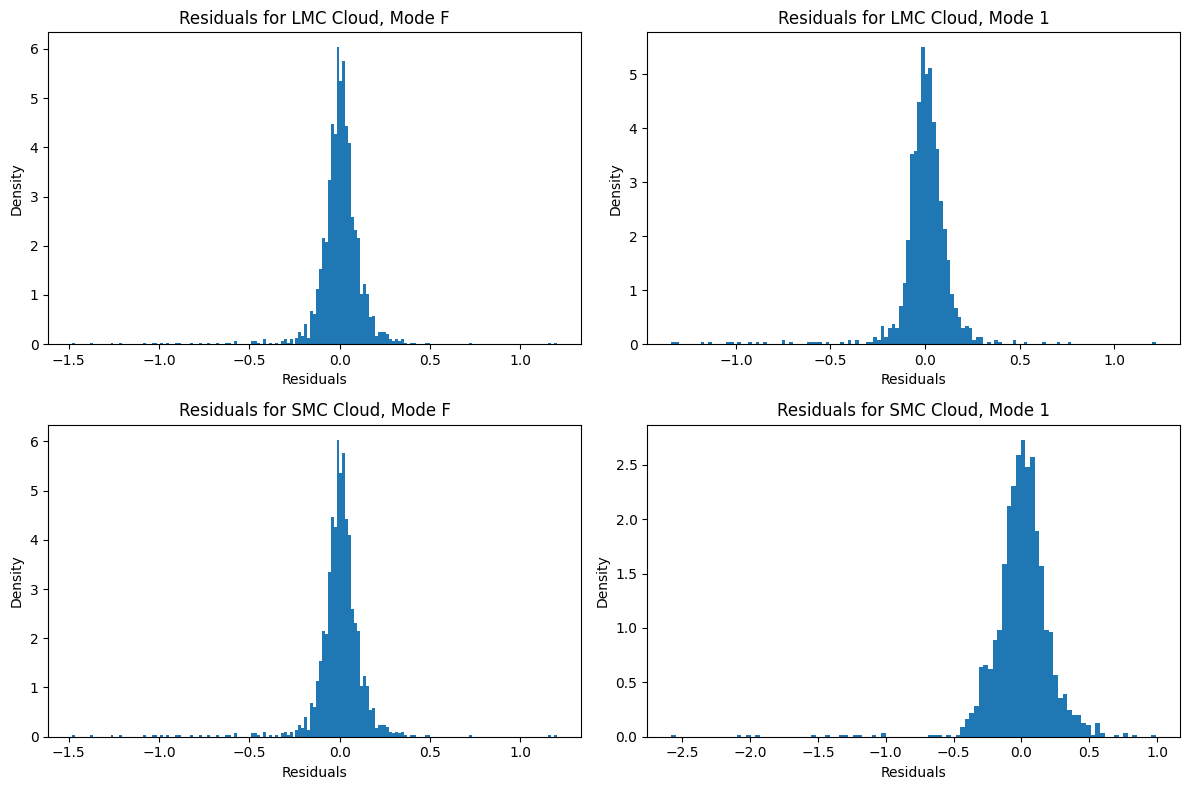

Shapiro-Wilk test for LMC Cloud, Mode F:
   Test statistic: 0.6941714882850647
   p-value: 0.0

Shapiro-Wilk test for LMC Cloud, Mode 1:
   Test statistic: 0.6821330785751343
   p-value: 4.8765186558503634e-43

Shapiro-Wilk test for SMC Cloud, Mode F:
   Test statistic: 0.6941714882850647
   p-value: 0.0

Shapiro-Wilk test for SMC Cloud, Mode 1:
   Test statistic: 0.805868923664093
   p-value: 1.8677206581753324e-40



In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Compute residuals for LMC Cloud, Mode F
residuals_lmcf = lmcf_W - reg_lmcf.predict(lmcf_P)

# Compute residuals for LMC Cloud, Mode 1
residuals_lmco = lmco_W - reg_lmco.predict(lmco_P)

# Compute residuals for SMC Cloud, Mode F
residuals_smcf = smcf_W - reg_smcf.predict(smcf_P)

# Compute residuals for SMC Cloud, Mode 1
residuals_smco = smco_W - reg_smco.predict(smco_P)

# Plotting the residuals for each sample
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(residuals_lmcf, bins='auto', density=True)
plt.title('Residuals for LMC Cloud, Mode F')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
plt.hist(residuals_lmco, bins='auto', density=True)
plt.title('Residuals for LMC Cloud, Mode 1')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.subplot(2, 2, 3)
plt.hist(residuals_smcf, bins='auto', density=True)
plt.title('Residuals for SMC Cloud, Mode F')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
plt.hist(residuals_smco, bins='auto', density=True)
plt.title('Residuals for SMC Cloud, Mode 1')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_results = [
    ('LMC Cloud, Mode F', stats.shapiro(residuals_lmcf)),
    ('LMC Cloud, Mode 1', stats.shapiro(residuals_lmco)),
    ('SMC Cloud, Mode F', stats.shapiro(residuals_smcf)),
    ('SMC Cloud, Mode 1', stats.shapiro(residuals_smco))
]

for label, result in shapiro_results:
    print(f"Shapiro-Wilk test for {label}:")
    print(f"   Test statistic: {result[0]}")
    print(f"   p-value: {result[1]}")
    print("")



Based on the provided Shapiro-Wilk test results, the p-values for all four samples are extremely small. This suggests strong evidence against the null hypothesis that the residuals follow a normal distribution. Therefore, based on the given information, the residuals do not appear to follow a normal distribution.

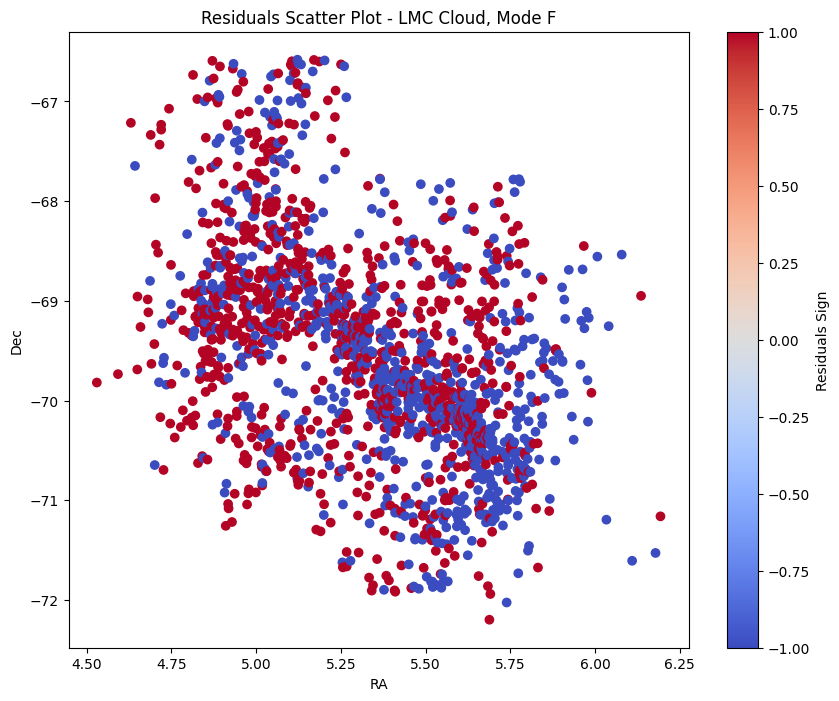

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Determine the sign of the residuals
residuals_sign_lmcf = np.sign(residuals_lmcf)
residuals_sign_lmco = np.sign(residuals_lmco)
residuals_sign_smcf = np.sign(residuals_smcf)
residuals_sign_smco = np.sign(residuals_smco)

# Create scatter plot
plt.figure(figsize=(10, 8))

# LMC Cloud, Mode F
plt.scatter(lmcf['RA0'], lmcf['Decl0'], c=residuals_sign_lmcf, cmap='coolwarm')
plt.colorbar(label='Residuals Sign')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Residuals Scatter Plot - LMC Cloud, Mode F')

plt.show()





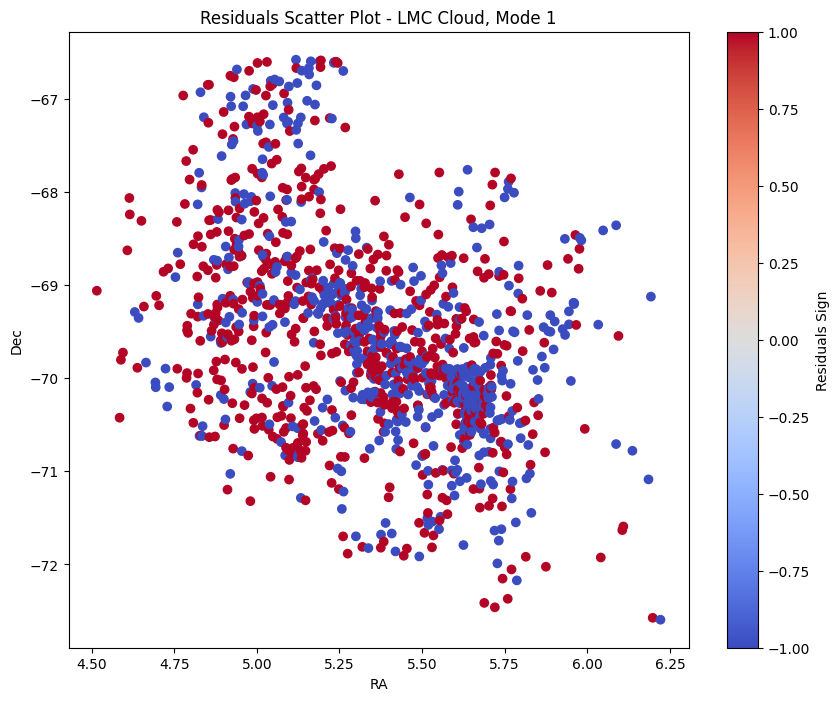

In [ ]:
# LMC Cloud, Mode 1
plt.figure(figsize=(10, 8))

plt.scatter(lmco['RA0'], lmco['Decl0'], c=residuals_sign_lmco, cmap='coolwarm')
plt.colorbar(label='Residuals Sign')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Residuals Scatter Plot - LMC Cloud, Mode 1')

plt.show()

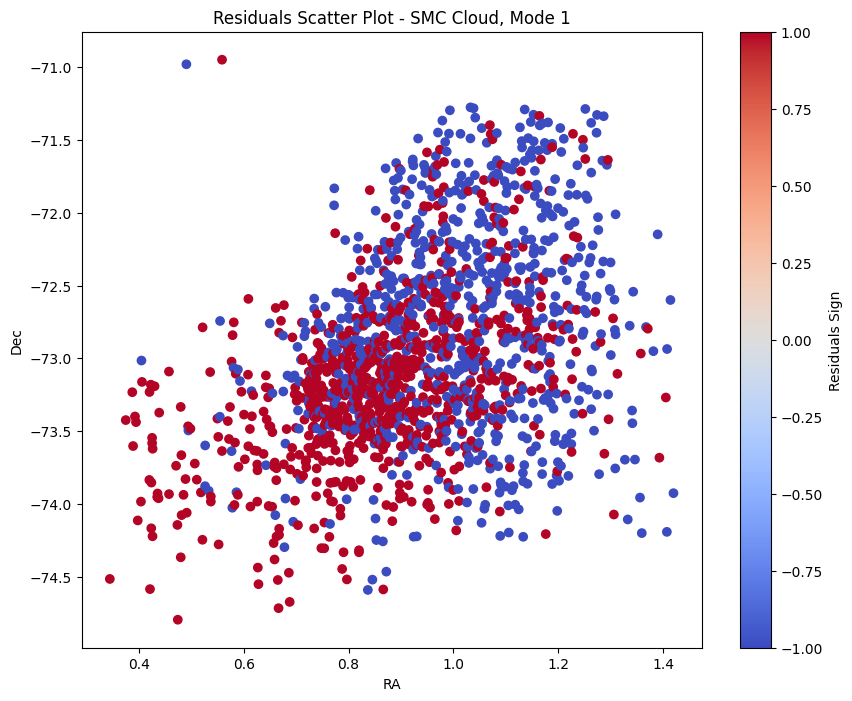

In [ ]:
# SMC Cloud, Mode 1
plt.figure(figsize=(10, 8))

plt.scatter(smco['RA0'], smco['Decl0'], c=residuals_sign_smco, cmap='coolwarm')
plt.colorbar(label='Residuals Sign')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Residuals Scatter Plot - SMC Cloud, Mode 1')

plt.show()